# An interactive notebook with the FRB/US model
This notebook is based on the the FRB/US model packages located here https://www.federalreserve.gov/econres/us-models-package.htm. The packages provides an Eviews https://www.eviews.com/ implementation. The Eviews modelspecification has been transformed to ModelFlow BusinessLogic specification. 

You can experiment with the model using a simple interactive interface. 

FRB/US comes in two flawors: **VAR** in which expectaions are generated by backward looking equations, and **MCE** in which expectation are based on leaded values. 
This notebook implement the **VAR** flavour.

The tool used is highly experimental and the results are purely for illustration. 

You can run each cell by pressing the run tool or shift+enter
To run all cells use select cell/run all in the menu bar. 

# Import Python libraries

In [2]:
%matplotlib inline

from modelclass import model
import modelmf
model.modelflow_auto()

# Load the model and run a  baseline

In [3]:
mfrbus, basedf =  model.modelload('mfrbusvar.json')
res = mfrbus(basedf,'2020q1','2025q4',silent=1,stats=0)

# Define an interactive input widget
This widget allows you to input 

In [4]:
slidedef = {'Initial taylor':                {'var':'RFFINTAY_AERR','value':0.0,'min':-3, 'max':3,'op':'+'},
            'Initial taylor inital impulse': {'var':'RFFINTAY_AERR','value':0.0,'min':-3, 'max':3,'op':'+impulse'},
            'Minimum federal funds':         {'var':'RFFMIN',       'value':0.0,'min':-20,'max':5,'op':'='       ,'step':1.0}
            }
radiodef = {'Monetary policy reaction':
            [['Inertial Taylor rule','DMPINTAY'],
             ['Taylor rule','DMPTAY'],
             ['Taylor rule with unemployment gap','DMPTLR'],
             ['Estimated rule','DMPALT'],
             ['Generalized rule','DMPGEN'],
             ['Exogenous nominal funds rate', 'DMPEX'],
             ['Exogenous real funds rate', 'DMPRR']
            ]
           }
           
checkdef = [('Timing of zero lower bound', 'DMPTRSH' ,True) ]

input = mfrbus.inputwidget('2020q1','2025q4',slidedef=slidedef,checkdef=checkdef,radiodef=radiodef
                   ,showout=True,varpat='RFF XGDPN RFFMIN GFSRPN DMPTRSH',trans=mfrbus.var_description)

In [5]:
# Define the experiment
experiments = [
  ['Inertial Taylor rule', 'DMPINTAY'],
  ['Taylor rule', 'DMPTAY'],
  ['Taylor rule with unemployment gap', 'DMPTLR'],
  ['Estimated rule', 'DMPALT'],
  ['Generalized rule', 'DMPGEN'],
  ['Exogenous nominal funds rate', 'DMPEX'],
  ['Exogenous real funds rate', 'DMPRR']]
newbasedf = basedf.copy()                     # make a new dataframe
 
newbasedf.loc[:,[v for e,v in experiments]]=0 # Set all policy dummies to 0

for experiment,var in experiments:            # loop over the policy options and update 
    altdf=newbasedf.mfcalc(f'''\
          rffintay_aerr = rffrule_aerr - 2       
          rffmin        = 0.0        
          {var} = 1
    ''')
    result = mfrbus(altdf,'2020q1','2025q4',keep=f'Monetary policy rule:{experiment}')

mfrbus.keep_viz('rff xgdp rg10p',legend = True)

Output()

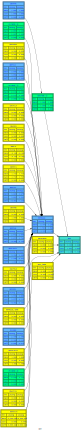

In [9]:
with mfrbus.set_smpl('2020q1','2020q2'):
    mfrbus.rff.draw(up=2,down=0,HR=0,all=True)

In [10]:
mfrbus.rffmin

Exogeneous : RFFMIN 
 Values : 
      2020Q1  2020Q2  2020Q3  2020Q4  2021Q1  2021Q2  2021Q3  2021Q4  2022Q1  \
Base -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
Last     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
Diff  9999.0  9999.0  9999.0  9999.0  9999.0  9999.0  9999.0  9999.0  9999.0   

      2022Q2  ...  2023Q3  2023Q4  2024Q1  2024Q2  2024Q3  2024Q4  2025Q1  \
Base -9999.0  ... -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0   
Last     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
Diff  9999.0  ...  9999.0  9999.0  9999.0  9999.0  9999.0  9999.0  9999.0   

      2025Q2  2025Q3  2025Q4  
Base -9999.0 -9999.0 -9999.0  
Last     0.0     0.0     0.0  
Diff  9999.0  9999.0  9999.0  

[3 rows x 24 columns]